# **Importing the Dataset**

In [1]:
import os
import pandas as pd

In [2]:
if os.path.exists('/kaggle/input/digit-recognizer'):
    train_path = '/kaggle/input/digit-recognizer/train.csv'
    test_path = '/kaggle/input/digit-recognizer/test.csv'
else:
    train_path = 'train.csv' 
    test_path = 'test.csv'    

try:
    dfa = pd.read_csv(train_path)
    dfb = pd.read_csv(test_path)
    print("Datasets loaded successfully!")
except FileNotFoundError:
    raise FileNotFoundError("Error: Check if the files exist at the specified paths.")

Datasets loaded successfully!


# **Exploratory Data Analysis (EDA)**

In [3]:
dfa.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfb.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
dfa.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


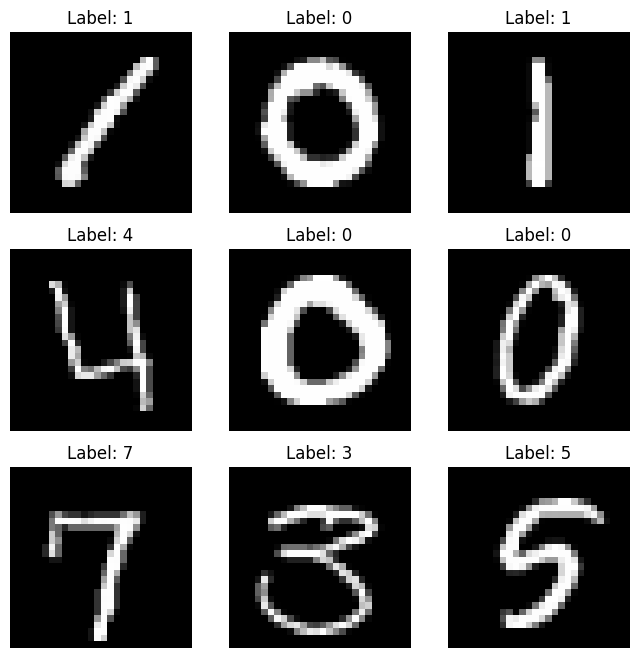

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def show_images(df, num_images=9):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        label = df.iloc[i]["label"]  # Access label column
        image = df.drop(columns=["label"]).iloc[i].values.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    plt.show()

show_images(dfa)

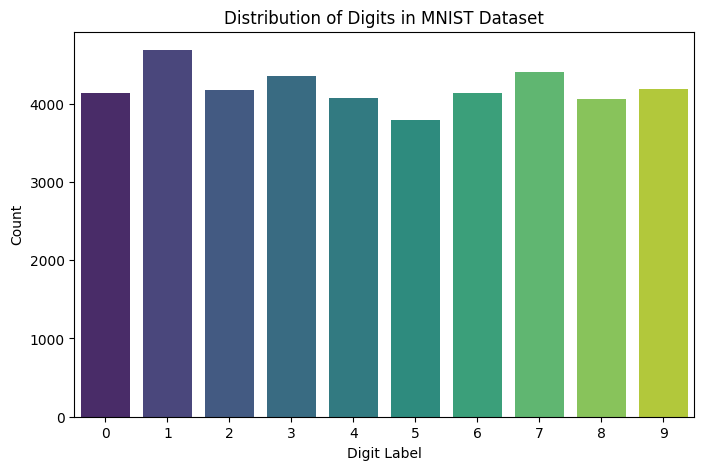

In [8]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=dfa["label"], palette="viridis")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.title("Distribution of Digits in MNIST Dataset")
plt.show()

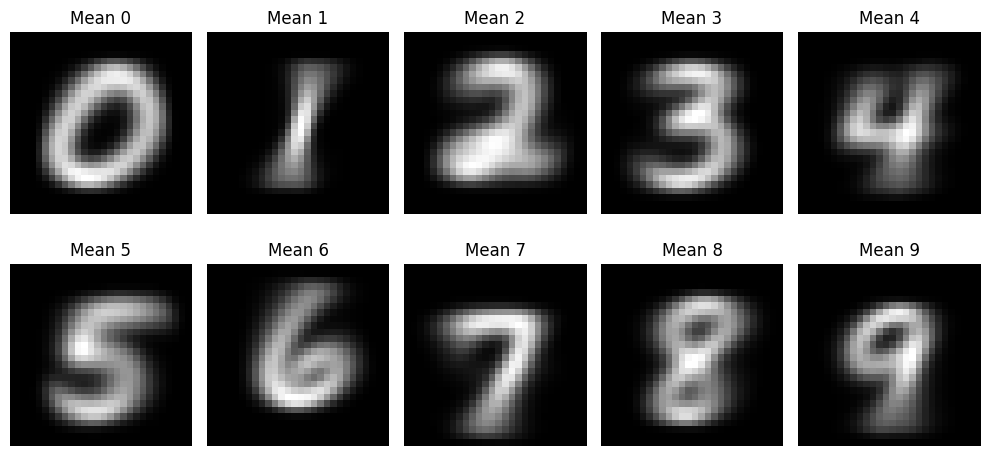

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for digit in range(10):
    mean_image = dfa[dfa["label"] == digit].drop(columns=["label"]).mean().values.reshape(28, 28)
    ax = axes[digit // 5, digit % 5]
    ax.imshow(mean_image, cmap="gray")
    ax.set_title(f"Mean {digit}")
    ax.axis("off")

plt.tight_layout()
plt.show()

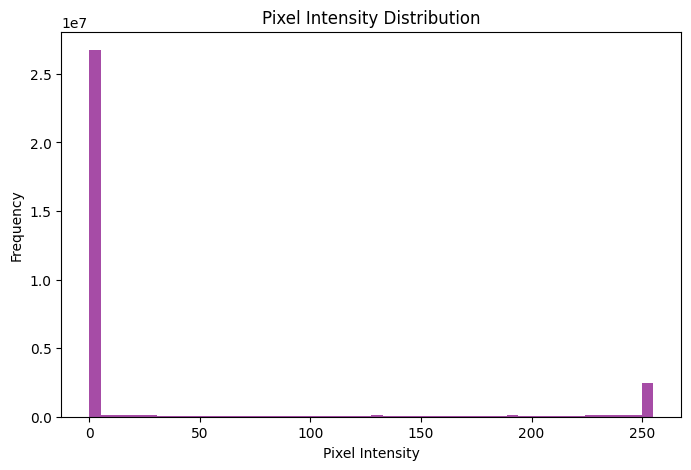

In [10]:
pixels = dfa.drop(columns=["label"]).values.flatten()

plt.figure(figsize=(8,5))
plt.hist(pixels, bins=50, color='purple', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

In [11]:
#dfa = dfa.copy()
#dfb = dfb.copy()

#dfa.iloc[:, 1:] = dfa.iloc[:, 1:].astype(np.float32) / 255.0
#dfb.iloc[:, 1:] = dfb.iloc[:, 1:].astype(np.float32) / 255.0

#print("Max pixel value in dfa:", dfa.iloc[:, 1:].max().max())
#print("Max pixel value in dfb:", dfb.iloc[:, 1:].max().max())

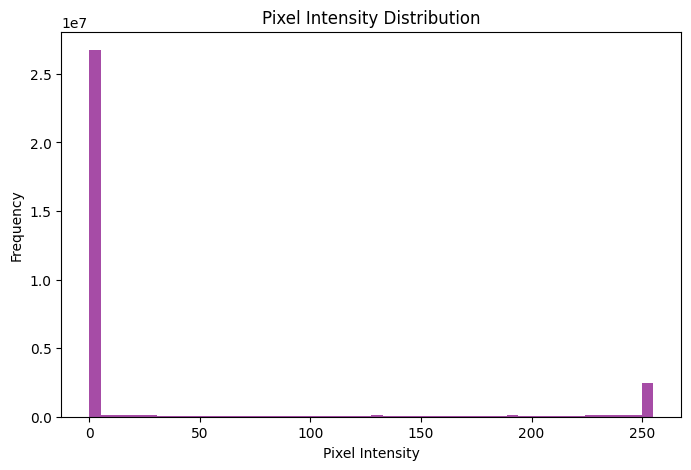

In [12]:
pixels = dfa.drop(columns=["label"]).values.flatten()

plt.figure(figsize=(8,5))
plt.hist(pixels, bins=50, color='purple', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

In [13]:
dfa.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [14]:
dfb.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


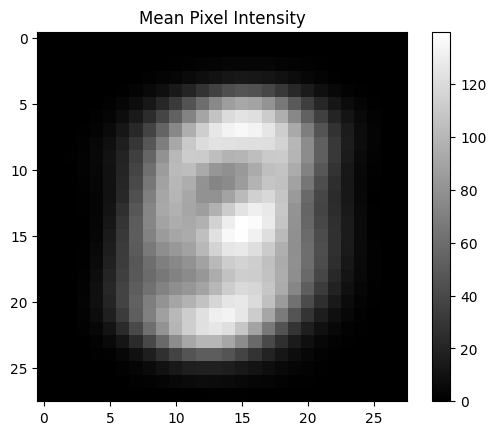

In [15]:
mean_image = dfa.iloc[:, 1:].mean().values.reshape(28, 28)  # Assuming 28x28 images
plt.imshow(mean_image, cmap="gray")
plt.title("Mean Pixel Intensity")
plt.colorbar()
plt.show()

In [16]:
non_contributing_pixels = (dfa.iloc[:, 1:] == 0).all().sum()
print(f"Number of pixels that are always zero: {non_contributing_pixels}")

Number of pixels that are always zero: 76


In [17]:
non_contributing_pixels = (dfa.iloc[:, 1:] == 0).all(axis=0)
columns_to_remove = non_contributing_pixels[non_contributing_pixels].index
dfa_filtered = dfa.drop(columns=columns_to_remove)
dfb_filtered = dfb.drop(columns=columns_to_remove)

print(f"New shape of dfa: {dfa_filtered.shape}")
print(f"New shape of dfb: {dfb_filtered.shape}")


New shape of dfa: (42000, 709)
New shape of dfb: (28000, 708)


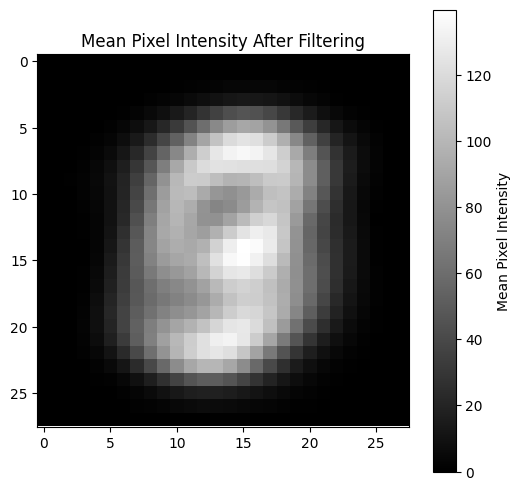

In [18]:
mean_pixel_values = dfa.iloc[:, 1:].mean(axis=0).values

size = int(np.ceil(np.sqrt(len(mean_pixel_values))))
padded_values = np.zeros((size * size,))
padded_values[: len(mean_pixel_values)] = mean_pixel_values
mean_image = padded_values.reshape((size, size))

plt.figure(figsize=(6, 6))
plt.imshow(mean_image, cmap="gray")
plt.colorbar(label="Mean Pixel Intensity")
plt.title("Mean Pixel Intensity After Filtering")
plt.show()

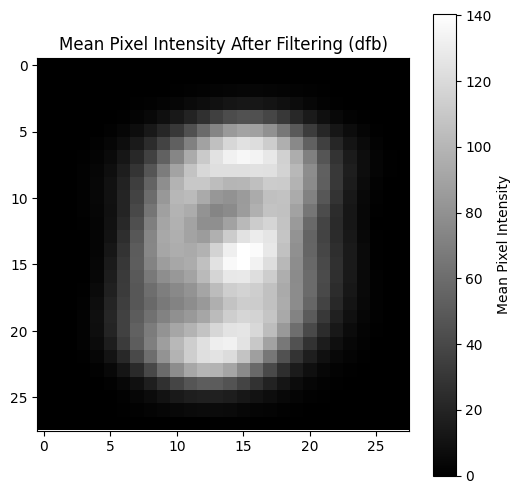

In [19]:
mean_pixel_values_dfb = dfb.mean(axis=0).values

size_dfb = int(np.ceil(np.sqrt(len(mean_pixel_values_dfb))))
padded_values_dfb = np.zeros((size_dfb * size_dfb,))
padded_values_dfb[: len(mean_pixel_values_dfb)] = mean_pixel_values_dfb
mean_image_dfb = padded_values_dfb.reshape((size_dfb, size_dfb))

plt.figure(figsize=(6, 6))
plt.imshow(mean_image_dfb, cmap="gray")
plt.colorbar(label="Mean Pixel Intensity")
plt.title("Mean Pixel Intensity After Filtering (dfb)")
plt.show()

# **Pre-processing Stage**

In [20]:
import torch
from torchvision import transforms

dfa_tensor = torch.tensor(dfa.iloc[:, 1:].values, dtype=torch.float32)
mean = dfa_tensor.mean()
std = dfa_tensor.std()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean.item()], std=[std.item()])
])

dfb_tensor = torch.tensor(dfb.values, dtype=torch.float32)
mean_dfb = dfb_tensor.mean()
std_dfb = dfb_tensor.std()

transform_dfb = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean_dfb.item()], std=[std_dfb.item()])
])

In [21]:
dfa.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [22]:
dfb.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [23]:
Dfa = dfa.iloc[:, 1:].values.reshape(-1, 1, 28, 28)
Dfb = dfb.values.reshape(-1, 1, 28, 28)

# **Training Deep Learning Models**

In [24]:
from sklearn.model_selection import train_test_split
Dfa_train, Dfa_val, labels_train, labels_val = train_test_split(Dfa, dfa.iloc[:, 0].values, test_size=0.2, random_state=42)

In [25]:
import torch

Dfa_train_tensor = torch.tensor(Dfa_train, dtype=torch.float32)
Dfa_val_tensor = torch.tensor(Dfa_val, dtype=torch.float32)
labels_train_tensor = torch.tensor(labels_train, dtype=torch.long)
labels_val_tensor = torch.tensor(labels_val, dtype=torch.long)

In [26]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

train_dataset = CustomDataset(Dfa_train, labels_train)
val_dataset = CustomDataset(Dfa_val, labels_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  
        self.fc2 = nn.Linear(128, 10)  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_model(model, train_loader, val_loader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Validation Accuracy: {100 * correct / total:.2f}%")

In [29]:
train_model(model, train_loader, val_loader, epochs=10)

Epoch 1/10, Loss: 0.3471513190830038
Validation Accuracy: 96.73%
Epoch 2/10, Loss: 0.06766488295913274
Validation Accuracy: 98.15%
Epoch 3/10, Loss: 0.04737658567227689
Validation Accuracy: 98.32%
Epoch 4/10, Loss: 0.03713186981904853
Validation Accuracy: 97.75%
Epoch 5/10, Loss: 0.029557871879632807
Validation Accuracy: 97.17%
Epoch 6/10, Loss: 0.026461644048201075
Validation Accuracy: 98.13%
Epoch 7/10, Loss: 0.021384406924378364
Validation Accuracy: 98.15%
Epoch 8/10, Loss: 0.023986449315315916
Validation Accuracy: 98.00%
Epoch 9/10, Loss: 0.023328103031169684
Validation Accuracy: 98.10%
Epoch 10/10, Loss: 0.018379910445154607
Validation Accuracy: 98.21%


In [30]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")

model = model.to(device)
Dfa_train_tensor = Dfa_train_tensor.to(device)
Dfa_val_tensor = Dfa_val_tensor.to(device)
labels_train_tensor = labels_train_tensor.to(device)
labels_val_tensor = labels_val_tensor.to(device)

Using device: Tesla T4


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
Dfa_train_tensor = Dfa_train_tensor.to(device)
Dfa_val_tensor = Dfa_val_tensor.to(device)
labels_train_tensor = labels_train_tensor.to(device)
labels_val_tensor = labels_val_tensor.to(device)

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

num_classes = len(torch.unique(labels_train_tensor))

class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(256 * 7 * 7, 512)  
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)  # Ensure num_classes is defined

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)

        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [33]:
model = ComplexCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.6f}, Validation Accuracy: {accuracy:.2f}%")

Epoch 1/10, Loss: 0.332714, Validation Accuracy: 98.01%
Epoch 2/10, Loss: 0.112683, Validation Accuracy: 98.15%
Epoch 3/10, Loss: 0.091850, Validation Accuracy: 98.33%
Epoch 4/10, Loss: 0.078428, Validation Accuracy: 98.75%
Epoch 5/10, Loss: 0.061434, Validation Accuracy: 98.93%
Epoch 6/10, Loss: 0.056476, Validation Accuracy: 99.14%
Epoch 7/10, Loss: 0.048243, Validation Accuracy: 98.76%
Epoch 8/10, Loss: 0.045272, Validation Accuracy: 99.21%
Epoch 9/10, Loss: 0.042645, Validation Accuracy: 99.15%
Epoch 10/10, Loss: 0.039258, Validation Accuracy: 99.00%


In [35]:
import torch

batch_size = 512  
predictions = []

Dfb_tensor = torch.tensor(Dfb, dtype=torch.float32).to(device)  

with torch.no_grad():
    for i in range(0, len(Dfb_tensor), batch_size):
        batch = Dfb_tensor[i:i + batch_size]  # No need for `.to(device)` here
        outputs = model(batch)
        batch_predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        predictions.extend(batch_predictions)

predictions_df = pd.DataFrame({"ImageId": range(1, len(predictions) + 1), "Label": predictions})
predictions_df.to_csv("predictions.csv", index=False)

In [36]:
torch.save(model.state_dict(), "MNIST_DATASET_MODEL.pth")
print("Model saved successfully!")

Model saved successfully!
